# 01-Classifier

In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Load an image of opened eye
img = load_img('open/openedEye0.jpg',grayscale=True)
x = img_to_array(img)  # this is a Numpy array with shape (260, 400, 1)
x = x.reshape((x.shape[:2])) # this is a Numpy array with shape (260, 400)

# Display it
import matplotlib.pyplot as plt
plt.imshow(x/255., cmap='gray')
plt.show()

Using TensorFlow backend.
/home/vince/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


<Figure size 640x480 with 1 Axes>

/home/vince/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


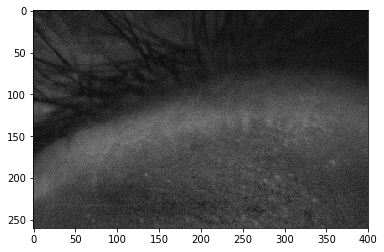

In [2]:
# Same for a closed eye
img = load_img('close/closedEye0.jpg',grayscale=True)
x = img_to_array(img)  # this is a Numpy array with shape (260, 400, 1)
x = x.reshape((x.shape[:2])) # this is a Numpy array with shape (260, 400)

# Display it
plt.imshow(x/255., cmap='gray')
plt.show()

In [15]:
import numpy as np
# Load all images opened eye
X = np.zeros((480,260*400))

for i in range(480):
    filename = 'open/openedEye'+str(i)+'.jpg'
    img = load_img(filename, grayscale=True)
    x = img_to_array(img)
    x = x.reshape((np.prod(x.shape[:2])))
    X[i] = x

    
# Load all images closed eye
X_close = np.zeros((346,260*400))

for i in range(346):
    filename = 'close/closedEye'+str(i)+'.jpg'
    img = load_img(filename, grayscale=True)
    x = img_to_array(img)
    x = x.reshape((np.prod(x.shape[:2])))
    X_close[i] = x

In [16]:
# Put all of it in a single array
X = np.concatenate((X, X_close))
X.shape

(826, 104000)

In [17]:
# Scale the data
X = X/255.

In [18]:
# Create the labels
y = np.zeros(826)
y[480:] = 1

In [19]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
X_train.shape

(660, 104000)

In [59]:
# Create your model 
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


# Create the function model
def model(input_dim, regul=0):

    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(100, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Add more layers of 100 units with regularization
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(regul)))
    
    return model

In [60]:
X_train.shape[1:]

(104000,)

In [61]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

# Define the model with regularization
model = model(input_dim=np.prod(X_train.shape[1:]), regul=0.00)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=20),
            TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=callbacks)

Train on 660 samples, validate on 166 samples
Epoch 1/100
660/660 [==============================] - 3s 4ms/step - loss: 1.5691 - val_loss: 1.9791
Epoch 2/100
660/660 [==============================] - 2s 4ms/step - loss: 1.1461 - val_loss: 0.8725
Epoch 3/100
660/660 [==============================] - 2s 3ms/step - loss: 0.6884 - val_loss: 0.7599
Epoch 4/100
660/660 [==============================] - 2s 3ms/step - loss: 0.7830 - val_loss: 1.0655
Epoch 5/100
660/660 [==============================] - 2s 3ms/step - loss: 0.7319 - val_loss: 0.5766
Epoch 6/100
660/660 [==============================] - 2s 3ms/step - loss: 0.5602 - val_loss: 0.4487
Epoch 7/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4662 - val_loss: 0.4187
Epoch 8/100
660/660 [==============================] - 2s 3ms/step - loss: 0.4299 - val_loss: 0.3416
Epoch 9/100
660/660 [==============================] - 2s 3ms/step - loss: 0.3826 - val_loss: 0.4121
Epoch 10/100
660/660 [=======================

In [62]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
y_pred_train = (model.predict(X_train)>=0.5)*1
y_pred_test = (model.predict(X_test)>=0.5)*1
print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))


accuracy on train with NN: 1.0
accuracy on test with NN: 0.9879518072289156


Accuracy on train: 100%

Accuracy on test: 98.79%

Could use regularization to make it up to 99 or 99.5% probably